<a href="https://colab.research.google.com/github/aahadley/Quantum-Computing/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aaron Hadley**  
**Homework 2**  
**COT 5600 - Spring 2019**


## Problem 1: Hadamard Test

Implement in Python a simulation of the Hadamard test for arbitrary unitaries $U \in \mathbb{C}^{2x2}$ and arbitrary quantum tests $|\psi \rangle \in \mathbb{C}^{2}$.  

Determine the probabilities for $U = X$ (bit flip) and $|+ \rangle$ and $|- \rangle$ using your code. Also, plot the probabilities for $U = diag(1, e^{2 \pi i \varphi})$ for $\varphi \in [0, 1)$ and $| \psi \rangle = |1 \rangle$.


## Problem 2: Swap Test

Implement in Python a simuation of the SWAP test for arbitrary $|\psi_1 \rangle, |\psi_2 \rangle \in \mathbb{C}^2$.  

Determine the probabilities for $|\psi_1 \rangle = |\psi_2 \rangle = |0 \rangle$ and $|\psi_1 \rangle = |0\rangle$ and $|\psi_2 \rangle = |1 \rangle$.  

Plot the probabilities for $|\psi_1 \rangle  = |0\rangle$ and $|\psi_2 \rangle = sin(2 \pi \theta)|0\rangle + e^{2 \pi i \varphi} cos(2 \pi \theta)$ for different $\theta, \varphi \in [0,1)$.

Problem 1:

Probablilities for  |+⟩:
0:	 0.9999999999999996 
1:	 1.0573994819069698e-33
Probablilities for  |-⟩:
0:	 1.0573994819069698e-33 
1:	 0.9999999999999996


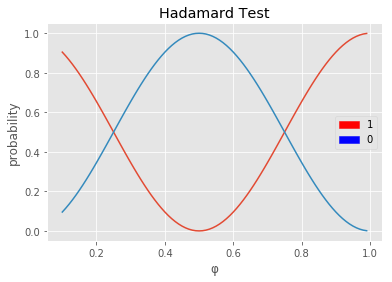


Problem 2:


Probabilities for |ψ1⟩=|ψ2⟩=|0⟩:	
0:	 0.9999999999999996 
1:	 5.004680467665246e-34

Probabilities for |ψ1⟩=|0⟩ and |ψ2⟩=|1⟩
0:	 0.4999999999999998 
1:	 0.4999999999999998


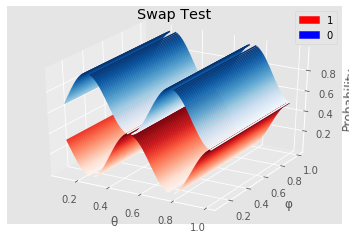

In [0]:
import numpy as np
from numpy import linalg as l2

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits import mplot3d



# Constants
ROOT2INV = (1 / np.sqrt(2))
K0 = np.array([1, 0])
K1 = np.array([0, 1])

plus = ROOT2INV * np.array([1, 1])
minus = ROOT2INV * np.array([1,-1])

# Gates

H = ROOT2INV * np.array([[1,  1],
                         [1, -1]], dtype=complex)

X = np.array([[0, 1],
              [1, 0]])

S = np.array([[1, 0, 0, 0],
              [0, 0, 1, 0],
              [0, 1, 0, 0],
              [0, 0, 0, 1]], dtype=complex)


def get_controlled_unitary(U):
    return np.kron(np.outer(K0, K0), np.identity(U.shape[0])) + np.kron(np.outer(K1, K1), U)


def hadamard_test(U, Ψ):
    
    I = np.identity(U.shape[0])
    
    #H on |0>
    h0 = H @ K0
    state = np.kron(h0, Ψ)
    
    #Controlled unitary on 0 -> psi
    state = get_controlled_unitary(U) @ state
    
    #H again
    state = np.kron(H, I) @ state
    
    # Projectors
    P0 = np.kron(np.outer(K0, K0), np.identity(U.shape[0]))
    P1 = np.kron(np.outer(K1, K1), np.identity(U.shape[0]))
            
    # measure
    m0 = l2.norm(P0 @ state)**2
    m1 = l2.norm(P1 @ state)**2
    
    return (m0, m1)


def swap_test(Ψ1, Ψ2):
    return hadamard_test(S, np.kron(Ψ1, Ψ2))


    
def main():
    
    print("Problem 1:\n")
    values = hadamard_test(X, plus)
    print("Probablilities for  |+⟩:\n0:\t", values[0], "\n1:\t", values[1])
    
    values = hadamard_test(X, minus)
    print("Probablilities for  |-⟩:\n0:\t", values[0], "\n1:\t", values[1])
    
    values = []
    y0 = []
    y1 = []
    
    # Hadamard Tests
    x = np.arange(0.1, 1.0, 0.01)
    
    for φ in x:
        U = (np.e**(2*np.pi*1j*φ)) * np.identity(2)
        
        values = hadamard_test(U, K1)
        y0.append(values[0])
        y1.append(values[1])
    
    
    plt.style.use("ggplot")
    plt.figure()
    
    blu_patch = patches.Patch(color='blue', label='0')
    red_patch = patches.Patch(color='red', label='1')
    
    plt.plot(x, y0)
    plt.plot(x, y1)
    
    plt.title("Hadamard Test")
    plt.xlabel('φ')
    plt.ylabel('probability')
    plt.legend(handles=[red_patch, blu_patch])
    
    plt.show()
    
    y0 = []
    y1 = []
    
    
    # Swap Tests
    print("\nProblem 2:\n")
    values = swap_test(K0, K0)
    print('\nProbabilities for |ψ1⟩=|ψ2⟩=|0⟩:\t\n0:\t', values[0], "\n1:\t", values[1])
    
    values = swap_test(K0, K1)
    print("\nProbabilities for |ψ1⟩=|0⟩ and |ψ2⟩=|1⟩\n0:\t", values[0], "\n1:\t", values[1])
    
    i=0
    for φ in x:
        y0.append([])
        y1.append([])
        
        for θ in x:
            p2 = np.sin(2*np.pi*θ)*K0 + ( (np.e**(2*np.pi*1j*φ)) * np.cos(2*np.pi*θ) ) * K1
            
            values = swap_test(K0, p2)
            y0[i].append(values[0])
            y1[i].append(values[1])
            
        i+=1

    
    plt.figure()
    axis = plt.axes(projection='3d')
    
    axis.contour3D(x, x, y0, 75, cmap='Blues')
    axis.contour3D(x, x, y1, 75, cmap='Reds')
    
    axis.set_title("Swap Test")
    #axis.set_facecolor((.60, .60, .60))
    axis.set_xlabel('θ')
    axis.set_ylabel('φ')
    axis.set_zlabel('Probability')
    axis.legend(handles=[red_patch, blu_patch])
    
    plt.show()
    
main()